In [31]:
run requirements.ipynb

In [11]:
run credentials.ipynb

In [12]:
client = Client(key, secret)

In [118]:
account = client.get_account()
balances = [d for d in account['balances'] if float(d['free']) > 0]
df = pd.DataFrame(balances)
df

,asset,free,locked
0,BNB,0.08553683,0.00000000
1,XRP,25.00000000,0.00000000
2,VET,454.83510000,0.00000000
3,ONE,235.00000000,0.00000000
4,FTM,10.00000000,0.00000000
5,SOL,0.46100000,0.00000000
6,SXP,11.70000000,0.00000000
7,DOT,1.78483830,0.00000000
8,LUNA,0.57000000,0.00000000
9,EGLD,0.28147790,0.00000000


In [14]:
#datastream via websocket

In [144]:
run functions.ipynb

In [42]:
#Buy if asset fell by more then 0.2% within the lastr 30 min
#Sell if asset rises by more then 0.15% or falls further by 0.15%

In [145]:
def close_position(symbol, sellOpt):
    while True:
        df = get_minute_data(symbol=symbol, loopback=sellOpt['loopback'])
        sincebuy = df.loc[df.index > pd.to_datetime(order['transactTime'], unit='ms')]
        if len(sincebuy) > 0:
            sincebuyret = get_cumulative_return(sincebuy.Open)
            if sincebuyret[-1] > (sellOpt['pct'] / 100) or sincebuyret[-1] < -(sellOpt['pct'] / 100):
                order = market_order(symbol=symbol, side='SELL', quantity=sellOpt['qtty'])
                print(order)
                break

In [146]:
def time_trade_strategy(symbol, buyOpt, sellOpt):
    df = get_minute_data(symbol=symbol, loopback=buyOpt['loopback'])
    # How asset has performed in the last 30 min
    cumulret = get_cumulative_return(df.Open)
    if cumulret[-1] < -(buyOpt['pct']/100):
        order = market_order(symbol=symbol, side='BUY', quantity=buyOpt['qtty'])
        print(order)
        close_position(symbol, sellOpt)
    else:
        print('No trade has been executed')
        df.Open.plot()
        print(cumulret[-1])
        print(buyOpt['pct']/100)

No trade has been executed
0.005212286827589452
0.002


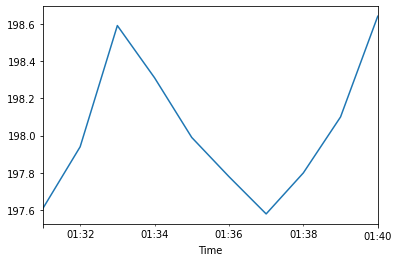

In [147]:
buyOpt = {'pct':0.2, 'qtty':5.5, 'loopback':'10'}
sellOpt = {'pct':0.15, 'qtty':5.5, 'loopback':'30'}
time_trade_strategy('SOLBUSD', buyOpt, sellOpt)